### Analyze user level, gender

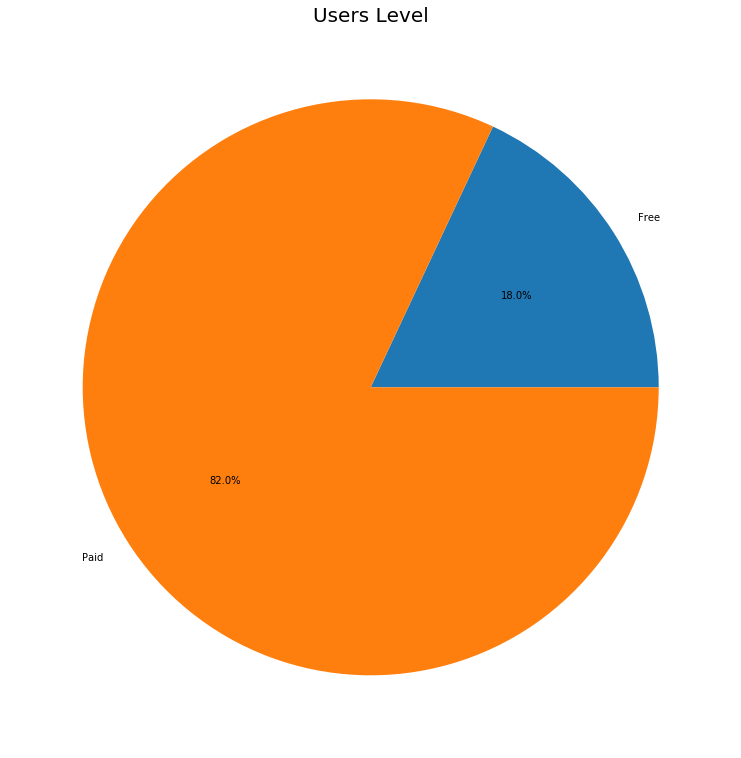

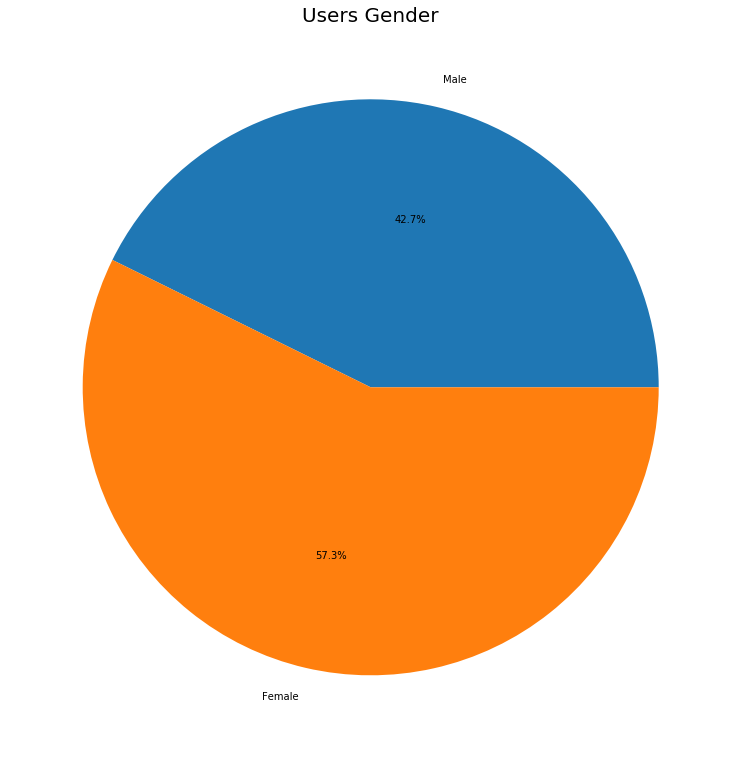

In [3]:
import psycopg2
from matplotlib import pyplot as plt


connect = psycopg2.connect("host=127.0.0.1 dbname=sparkifydb user=student password=student")
cursor = connect.cursor()

# Get number of free users
try:
    cursor.execute("SELECT COUNT(level) FROM songplays WHERE level = 'free'")

except psycopg2.Error as e:
    print("Error: select *")
    print(e)
no_free_users = cursor.fetchone()[0]

# Get number of paid users
try:
    cursor.execute("SELECT COUNT(level) FROM songplays WHERE level = 'paid'")
except psycopg2.Error as e:
    print("Error: select *")
    print(e)
no_paid_users = cursor.fetchone()[0]

# Get number of Male users
try:
    cursor.execute("SELECT COUNT(*) FROM users WHERE gender = 'M'")

except psycopg2.Error as e:
    print("Error: select *")
    print(e)
no_male_users = cursor.fetchone()[0]

# Get number of Female users
try:
    cursor.execute("SELECT COUNT(*) FROM users WHERE gender = 'F'")

except psycopg2.Error as e:
    print("Error: select *")
    print(e)
no_female_users = cursor.fetchone()[0]

connect.close()

# Plotting
user_level = ["Free", "Paid"]
user_gender = ["Male", "Female"]
data_level = [no_free_users, no_paid_users]
data_gender = [no_male_users, no_female_users]
plot_data_level = list(map(lambda x: x/sum(data_level) * 100, data_level))
plot_data_gender = list(map(lambda x: x/sum(data_gender) * 100, data_gender))

# Creating plot
fig = plt.figure(figsize =(10, 10))
ax = fig.add_axes([0,0,1,1])
fig1 = plt.figure(figsize =(10, 10))
ax1 = fig1.add_axes([0,0,1,1])

ax.pie(plot_data_level, 
       labels=user_level,
       autopct='%1.1f%%')
ax1.pie(plot_data_gender,
        labels=user_gender,
        autopct='%1.1f%%')
ax.set_title("Users Level", fontsize=20)
ax1.set_title("Users Gender", fontsize=20)

# show plot
plt.show()


### Analyze visits during November 

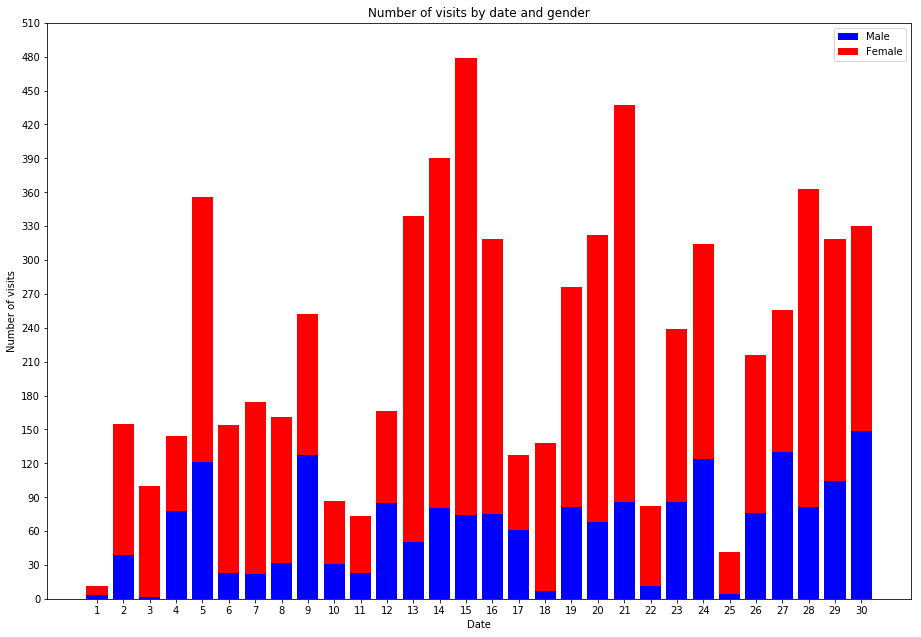

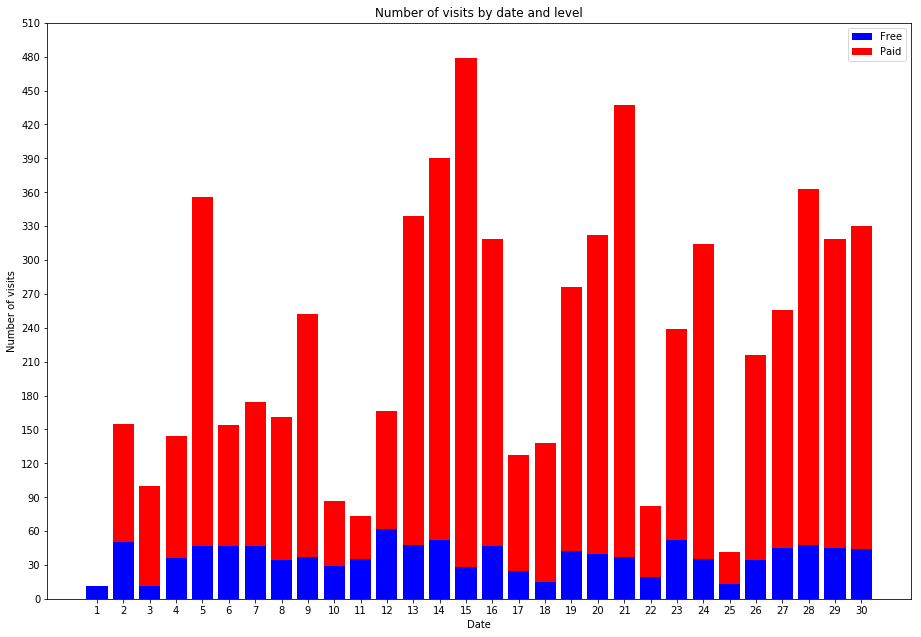

In [2]:
import psycopg2
from matplotlib import pyplot as plt
import numpy as np

connect = psycopg2.connect("host=127.0.0.1 dbname=sparkifydb user=student password=student")
cursor = connect.cursor()

# Get visits from Male user by day in November
try:
    cursor.execute(
        "SELECT time.day, COUNT(*) FROM (songplays JOIN time ON songplays.start_time = time.start_time) "
        "JOIN users ON songplays.user_id = users.user_id WHERE users.gender = 'M' GROUP BY time.day;")
except psycopg2.Error as e:
    print("Error: select *")
    print(e)

visits_male = cursor.fetchall()
visits_male.sort(key=lambda x: x[0])

# Get visits from Female user by day in November
try:
    cursor.execute(
        "SELECT time.day, COUNT(*) FROM (songplays JOIN time ON songplays.start_time = time.start_time) "
        "JOIN users ON songplays.user_id = users.user_id WHERE users.gender = 'F' GROUP BY time.day;")
except psycopg2.Error as e:
    print("Error: select *")
    print(e)

visits_female = cursor.fetchall()
visits_female.sort(key=lambda x: x[0])


# Get visits from free user by day in November
try:
    cursor.execute(
        "SELECT time.day, COUNT(*) FROM (songplays JOIN time ON songplays.start_time = time.start_time) "
        "JOIN users ON songplays.user_id = users.user_id WHERE users.level = 'free' GROUP BY time.day;")
except psycopg2.Error as e:
    print("Error: select *")
    print(e)

visits_free = cursor.fetchall()
visits_free.sort(key=lambda x: x[0])

# Get visits from paid user by day in November
try:
    cursor.execute(
        "SELECT time.day, COUNT(*) FROM (songplays JOIN time ON songplays.start_time = time.start_time) "
        "JOIN users ON songplays.user_id = users.user_id WHERE users.level = 'paid' GROUP BY time.day;")
except psycopg2.Error as e:
    print("Error: select *")
    print(e)

visits_paid = cursor.fetchall()
visits_paid.sort(key=lambda x: x[0])
visits_paid.insert(0, (1, 0)) # Because there is no "paid users" visit the website in the 1st Nov


connect.close()

# Get gender data
date = [x[0] for x in visits_female]
no_male_visits = [x[1] for x in visits_male]
no_female_visits = [x[1] for x in visits_female]

# Get level data
no_free_visits = [x[1] for x in visits_free]
no_paid_visits = [x[1] for x in visits_paid]

fig = plt.figure()
fig1 = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
ax1 = fig1.add_axes([0, 0, 2, 2])

# Plotting number of visits by date and gender
ax.bar(date, no_male_visits, color='b')
ax.bar(date, no_female_visits, bottom=no_male_visits, color='r')
ax.set_title('Number of visits by date and gender')
ax.set_xlabel('Date')
ax.set_ylabel('Number of visits')
ax.set_xticks(np.arange(1, 31, 1))
ax.set_yticks(np.arange(0, 511, 30))
ax.legend(labels=['Male', 'Female'])

# Plotting number of visits by data and level
ax1.bar(date, no_free_visits, color='b')
ax1.bar(date, no_paid_visits, bottom=no_free_visits, color='r')
ax1.set_title('Number of visits by date and level')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of visits')
ax1.set_xticks(np.arange(1, 31, 1))
ax1.set_yticks(np.arange(0, 511, 30))
ax1.legend(labels=['Free', 'Paid'])

plt.show()

connect.close()
